In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Webservices called APIs --> We can send and receive data to them really easily with Python.

There is a data service called ERDDAP (Environmental Research Divishion Data Access Protocol) that lets us get data from buoys really easier (and a ton of other data, stream guages, satellite data, )

In [2]:
url = "https://erddap.sensors.axds.co/erddap/tabledap/org_mbari_m1.csv?time%2Csea_water_temperature%2Csea_water_temperature_qc_agg%2Cz&time%3E%3D2022-09-16T14%3A00%3A00Z&time%3C%3D2022-09-26T14%3A00%3A00Z&z%3E%3D-300&z%3C%3D-1"

In [3]:
df = pd.read_csv(url,skiprows=[1])
df.head()

time  sea_water_temperature  sea_water_temperature_qc_agg  \
0  2022-09-16T14:00:00Z               7.994056                             1   
1  2022-09-16T14:00:00Z               8.491611                             1   
2  2022-09-16T14:00:00Z               8.867377                             1   
3  2022-09-16T14:00:00Z               9.117675                             1   
4  2022-09-16T14:00:00Z               9.683963                             1   

       z  
0 -300.0  
1 -250.0  
2 -225.0  
3 -200.0  
4 -150.0

In [4]:
df['dateTime'] = pd.to_datetime(df['time'])
df = df.query("z == -1")

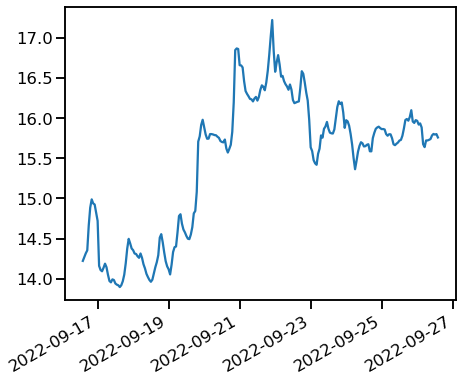

In [5]:
sns.set_context('talk')
fig, ax = plt.subplots()
fig.set_size_inches(7,6)
ax.plot(df["dateTime"], df['sea_water_temperature'])
fig.autofmt_xdate()

In [6]:
df['sea_water_temperature'].describe()

count    241.000000
mean      15.459095
std        0.856339
min       13.896700
25%       14.555042
50%       15.742222
75%       15.978262
max       17.218965
Name: sea_water_temperature, dtype: float64

## What if we had a ton of different data streams that we wanted to plot? ##

In [7]:
m1_url = "https://erddap.sensors.axds.co/erddap/tabledap/org_mbari_m1.csv?time%2Csea_water_temperature%2Csea_water_temperature_qc_agg%2Cz&time%3E=2022-09-01&z%3E%3D-300&z%3C%3D-1"
mba_url  = "http://erddap.cencoos.org/erddap/tabledap/monterey-bay-aquarium-seawate.csv?time%2Csea_water_temperature&time%3E=2022-09-01"
mlml_url = "http://erddap.cencoos.org/erddap/tabledap/mlml_mlml_sea.csv?time%2Csea_water_temperature&time%3E=2022-09-01"
data_urls = [mlml_url,mba_url,m1_url]

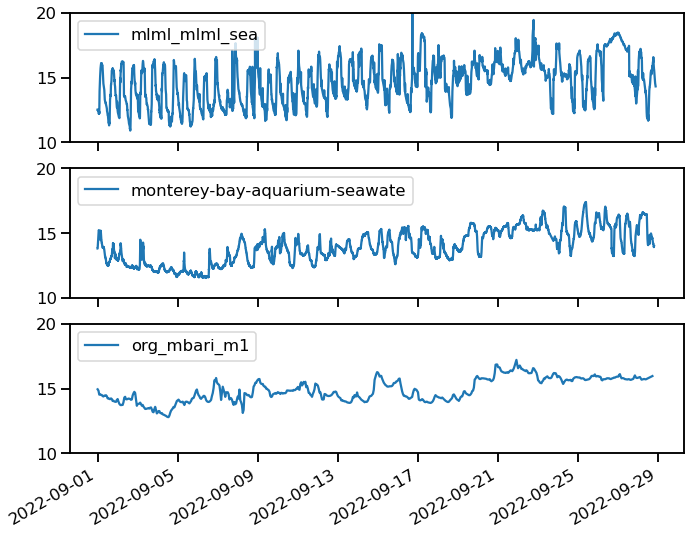

In [8]:
sns.set_context('talk')
fig, ax = plt.subplots(len(data_urls),sharex=True)
fig.set_size_inches(11,9)
for i, url in enumerate(data_urls):
    df = pd.read_csv(url,skiprows=[1])
    if url == m1_url:
        df = df.query("z == -1")
    df['dateTime'] = pd.to_datetime(df['time'])
    ax[i].plot(df["dateTime"], df['sea_water_temperature'],label=url.split("/")[5].split(".csv")[0])
    ax[i].legend()
    ax[i].set_ylim(10,20)
fig.autofmt_xdate()
